<a href="https://colab.research.google.com/github/arjunascagnetto/GoogleTF/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The labels associated with the dataset are:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [6]:
import matplotlib.pyplot as plt

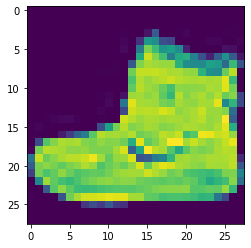

In [7]:
plt.imshow(training_images[0])

In [ ]:
print(training_images[0])

In [21]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [22]:
model = tf.keras.models.Sequential()

In [23]:
input_layer = tf.keras.layers.Flatten()
first_layer = tf.keras.layers.Dense(128,activation=tf.nn.relu)
output_layer = tf.keras.layers.Dense(10,activation=tf.nn.softmax)

In [25]:
model.add(input_layer)
model.add(first_layer)
model.add(output_layer)

In [26]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [45]:
modelFit = model.fit(training_images,training_labels,epochs=5,verbose=0)

In [49]:
modelFit.history

{'accuracy': [0.946066677570343,
  0.9476000070571899,
  0.9493499994277954,
  0.9498666524887085,
  0.9499333500862122],
 'loss': [0.1443621963262558,
  0.14039896428585052,
  0.13642746210098267,
  0.1354510635137558,
  0.13366633653640747]}

batch_size indica la dimensione dell'insieme di test. Steps il numero di volte che deve essere fatta l'evaluation. quindi con la seguente riga facciamo 100 x 100 = 10000 evaluation.

In [55]:
modelEvaluate = model.evaluate(test_images,test_labels,steps=200,verbose=1, batch_size=50)

200/200 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8910


In [56]:
modelEvaluate

[0.4033643305301666, 0.890999972820282]

In [57]:
classifications = model.predict(test_images)
print(classifications[0])

[3.43485865e-11 1.54612719e-13 1.12324965e-18 1.23874005e-20
 3.49395042e-19 1.28310012e-06 4.59404997e-12 3.10387841e-04
 4.23808158e-14 9.99688387e-01]


In [58]:
len(classifications)

10000

In [60]:
import numpy as np

In [62]:
print(np.round(classifications[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [63]:
print(test_labels[0])

9


In [64]:
training_labels[1:10]

array([0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)